# Imports

In [1]:
import numpy as np
import os, cv2, matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import metrics
from google.colab.patches import cv2_imshow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RNN, Dense, Dropout, BatchNormalization, SimpleRNN
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.saving import load_model
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Load dataset

In [2]:
X_train = np.load("/content/drive/MyDrive/DAT255_Semesterproject/processed_data/X_train.npy")
X_test = np.load("/content/drive/MyDrive/DAT255_Semesterproject/processed_data/X_test.npy")
y_train = np.load("/content/drive/MyDrive/DAT255_Semesterproject/processed_data/y_train.npy")
y_test = np.load("/content/drive/MyDrive/DAT255_Semesterproject/processed_data/y_test.npy")
n_classes = 6

LABELS = [
    "JUMPING",
    "JUMPING_JACKS",
    "BOXING",
    "WAVING_2HANDS",
    "WAVING_1HAND",
    "CLAPPING_HANDS"
]

# Convert labels to categorical
y_train_cat = to_categorical(y_train, num_classes=n_classes)
early_stop = EarlyStopping(monitor='loss', patience=2)

# RNN models testing

A simple model

In [3]:
rnn_model_0 = Sequential([
    SimpleRNN(128, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2]), unroll=True),
    Dense(n_classes, activation='softmax')
])

rnn_model_0.compile(optimizer=Adam(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

rnn_model_0.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        20,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,638 (84.52 KB)

 Trainable params: 21,638 (84.52 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = rnn_model_0.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.3, callbacks=[early_stop])

Epoch 1/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.3190 - loss: 1.5720 - val_accuracy: 0.5114 - val_loss: 1.1242
Epoch 2/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.5595 - loss: 1.0285 - val_accuracy: 0.6712 - val_loss: 0.7728
Epoch 3/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.6877 - loss: 0.7460 - val_accuracy: 0.7469 - val_loss: 0.6293
Epoch 4/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7535 - loss: 0.6159 - val_accuracy: 0.7626 - val_loss: 0.5828
Epoch 5/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7803 - loss: 0.5503 - val_accuracy: 0.7913 - val_loss: 0.5256
Epoch 6/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8086 - loss: 0.4897 - val_accuracy: 0.8217 - val_loss: 0.4594
Epoch 7/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8257 - loss: 0.4500 - val_accuracy: 0.8491 - val_loss: 0.4020
Epoch 8/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8403 - loss: 0.

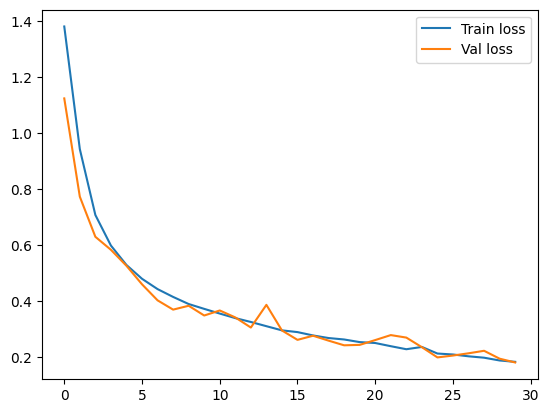

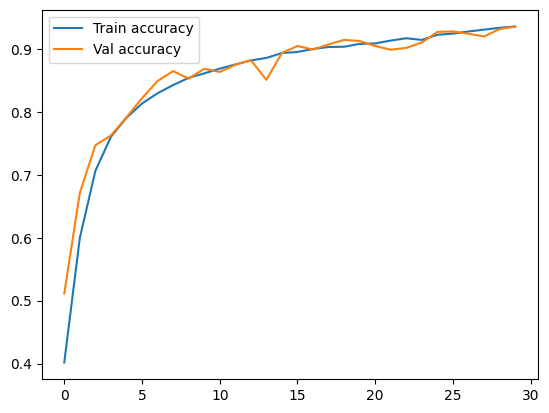

In [5]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val accuracy')
plt.legend()
plt.show()

Model with dropout

In [6]:
rnn_model_1 = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), unroll=True),
    Dropout(0.3),
    SimpleRNN(64, return_sequences=False, unroll=True),
    Dense(n_classes, activation='softmax')
])

rnn_model_1.compile(optimizer=Adam(0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

rnn_model_1.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 32, 128)        │        20,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,606 (131.27 KB)

 Trainable params: 33,606 (131.27 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = rnn_model_1.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.3, callbacks=[early_stop])

Epoch 1/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 27s 10ms/step - accuracy: 0.3421 - loss: 1.5369 - val_accuracy: 0.6321 - val_loss: 0.8688
Epoch 2/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6465 - loss: 0.8606 - val_accuracy: 0.7271 - val_loss: 0.6707
Epoch 3/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7435 - loss: 0.6315 - val_accuracy: 0.7784 - val_loss: 0.5430
Epoch 4/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7839 - loss: 0.5362 - val_accuracy: 0.8189 - val_loss: 0.4741
Epoch 5/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8161 - loss: 0.4772 - val_accuracy: 0.8413 - val_loss: 0.4071
Epoch 6/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8378 - loss: 0.4210 - val_accuracy: 0.8701 - val_loss: 0.3537
Epoch 7/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8548 - loss: 0.3875 - val_accuracy: 0.8870 - val_loss: 0.3069
Epoch 8/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8668 - loss: 0

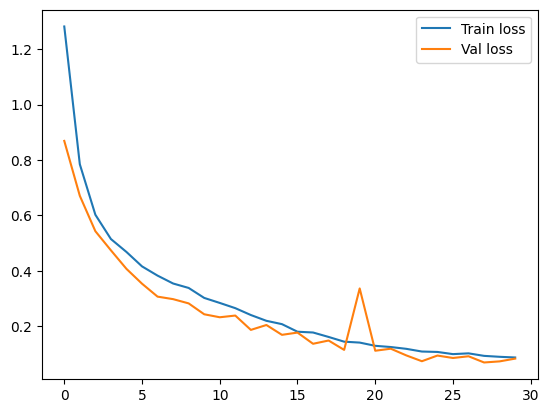

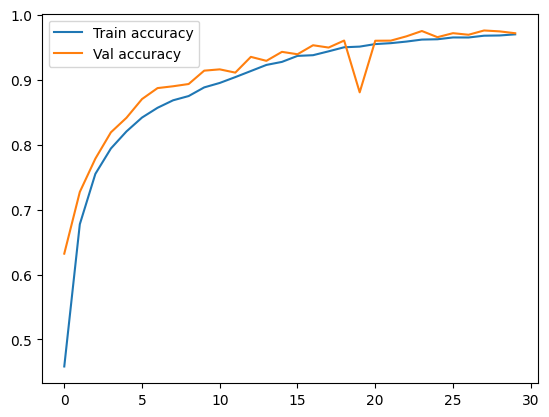

In [8]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val accuracy')
plt.legend()
plt.show()

In [9]:
rnn_model_2 = Sequential([
    SimpleRNN(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), unroll=True),
    Dropout(0.3),
    BatchNormalization(),
    Dense(64, activation='relu'),
    SimpleRNN(64, return_sequences=True, unroll=True),
    Dropout(0.3),
    BatchNormalization(),
    SimpleRNN(64, return_sequences=False, unroll=True),
    Dense(n_classes, activation='softmax')
])

rnn_model_2.compile(optimizer=Adam(0.0001),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

rnn_model_2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)        │ (None, 32, 128)        │        20,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 32, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,790 (182.77 KB)

 Trainable params: 46,406 (181.27 KB)

 Non-trainable params: 384 (1.50 KB)

In [10]:
history = rnn_model_2.fit(X_train, y_train_cat, epochs=30, batch_size=32, validation_split=0.3, callbacks=[early_stop])

Epoch 1/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 46s 18ms/step - accuracy: 0.2751 - loss: 1.7674 - val_accuracy: 0.6170 - val_loss: 0.9121
Epoch 2/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6292 - loss: 0.8950 - val_accuracy: 0.7301 - val_loss: 0.6654
Epoch 3/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7481 - loss: 0.6284 - val_accuracy: 0.7047 - val_loss: 0.8985
Epoch 4/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7985 - loss: 0.5082 - val_accuracy: 0.8511 - val_loss: 0.3877
Epoch 5/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8398 - loss: 0.4191 - val_accuracy: 0.8729 - val_loss: 0.3550
Epoch 6/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8586 - loss: 0.3757 - val_accuracy: 0.8956 - val_loss: 0.2823
Epoch 7/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8745 - loss: 0.3410 - val_accuracy: 0.8985 - val_loss: 0.2780
Epoch 8/30
1684/1684 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.8815 - loss: 

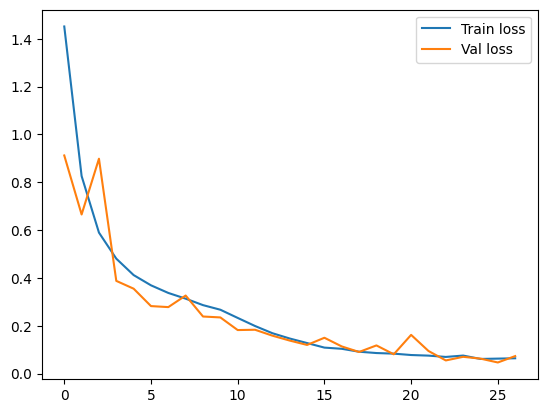

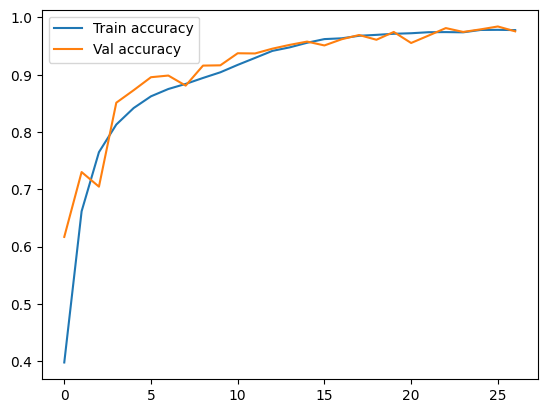

In [11]:
plt.plot(history.history['loss'],label = 'Train loss')
plt.plot(history.history['val_loss'],label = 'Val loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'],label = 'Train accuracy')
plt.plot(history.history['val_accuracy'],label = 'Val accuracy')
plt.legend()
plt.show()

# Testing and comparing models

Simplest model

180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy: 0.9438358546339767
                precision    recall  f1-score   support

       JUMPING       0.98      0.96      0.97       676
 JUMPING_JACKS       0.95      0.97      0.96       783
        BOXING       0.88      0.94      0.91      1216
 WAVING_2HANDS       0.97      0.97      0.97      1320
  WAVING_1HAND       0.99      0.96      0.98      1313
CLAPPING_HANDS       0.84      0.74      0.78       443

      accuracy                           0.94      5751
     macro avg       0.93      0.92      0.93      5751
  weighted avg       0.94      0.94      0.94      5751



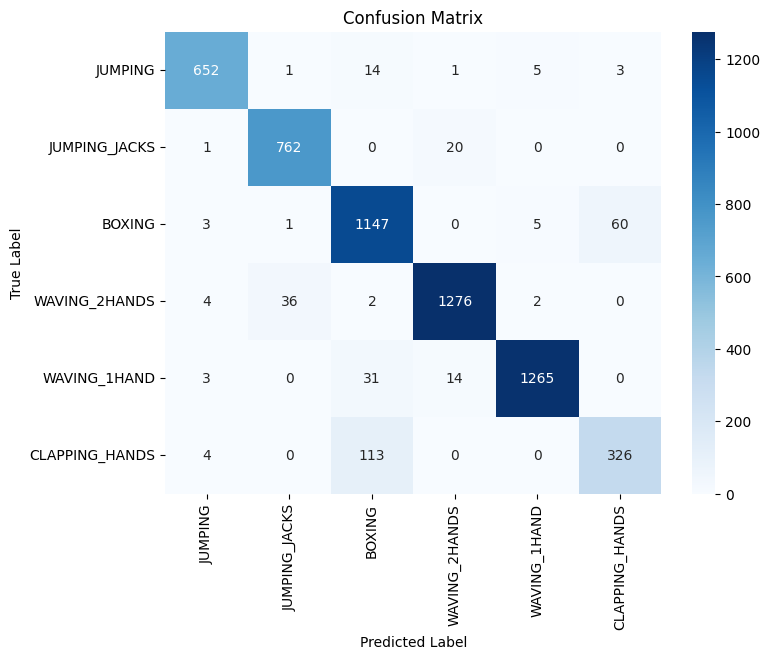

In [12]:
y_pred = rnn_model_0.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test
accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
print(metrics.classification_report(y_test_classes, y_pred_classes, target_names=LABELS))
conf_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

More layers

180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step
Accuracy: 0.9636584941749261
                precision    recall  f1-score   support

       JUMPING       0.98      1.00      0.99       676
 JUMPING_JACKS       1.00      0.97      0.99       783
        BOXING       0.97      0.90      0.94      1216
 WAVING_2HANDS       0.97      1.00      0.98      1320
  WAVING_1HAND       0.97      0.98      0.98      1313
CLAPPING_HANDS       0.82      0.91      0.87       443

      accuracy                           0.96      5751
     macro avg       0.95      0.96      0.96      5751
  weighted avg       0.97      0.96      0.96      5751



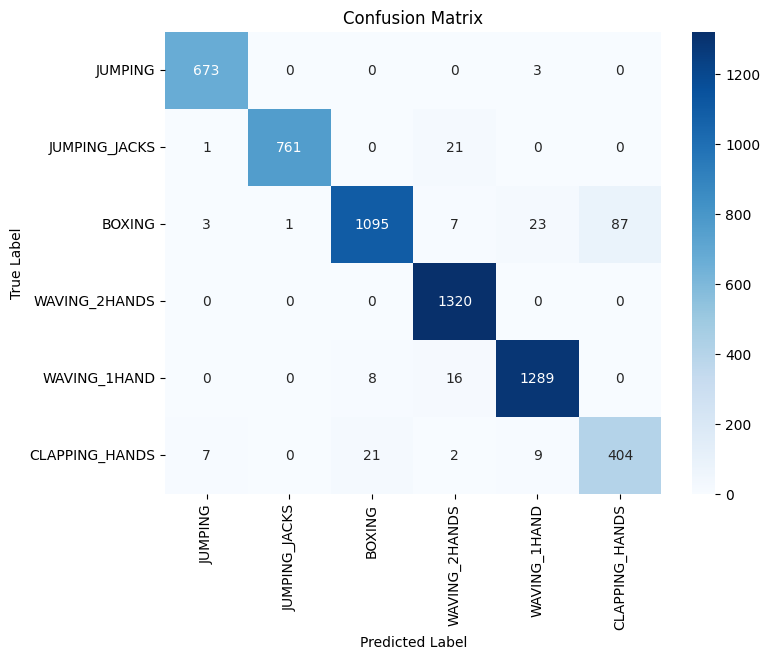

In [13]:
y_pred = rnn_model_1.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test
accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
print(metrics.classification_report(y_test_classes, y_pred_classes, target_names=LABELS))
conf_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Most complex model

180/180 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Accuracy: 0.9643540253868892
                precision    recall  f1-score   support

       JUMPING       1.00      1.00      1.00       676
 JUMPING_JACKS       1.00      1.00      1.00       783
        BOXING       0.98      0.86      0.92      1216
 WAVING_2HANDS       1.00      1.00      1.00      1320
  WAVING_1HAND       0.99      0.99      0.99      1313
CLAPPING_HANDS       0.72      0.98      0.83       443

      accuracy                           0.96      5751
     macro avg       0.95      0.97      0.95      5751
  weighted avg       0.97      0.96      0.97      5751



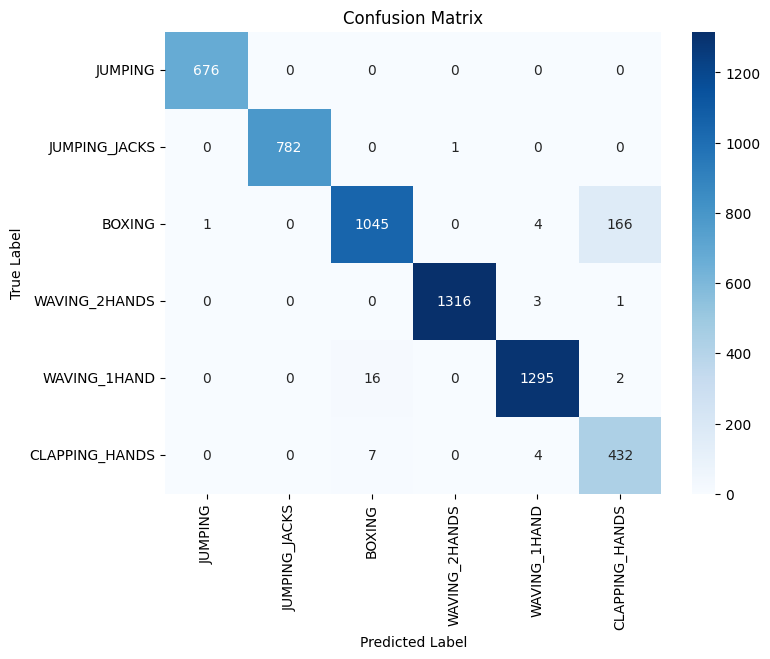

In [14]:
y_pred = rnn_model_2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test
accuracy = metrics.accuracy_score(y_test_classes, y_pred_classes)
print("Accuracy:", accuracy)
print(metrics.classification_report(y_test_classes, y_pred_classes, target_names=LABELS))
conf_matrix = metrics.confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=LABELS, yticklabels=LABELS)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()